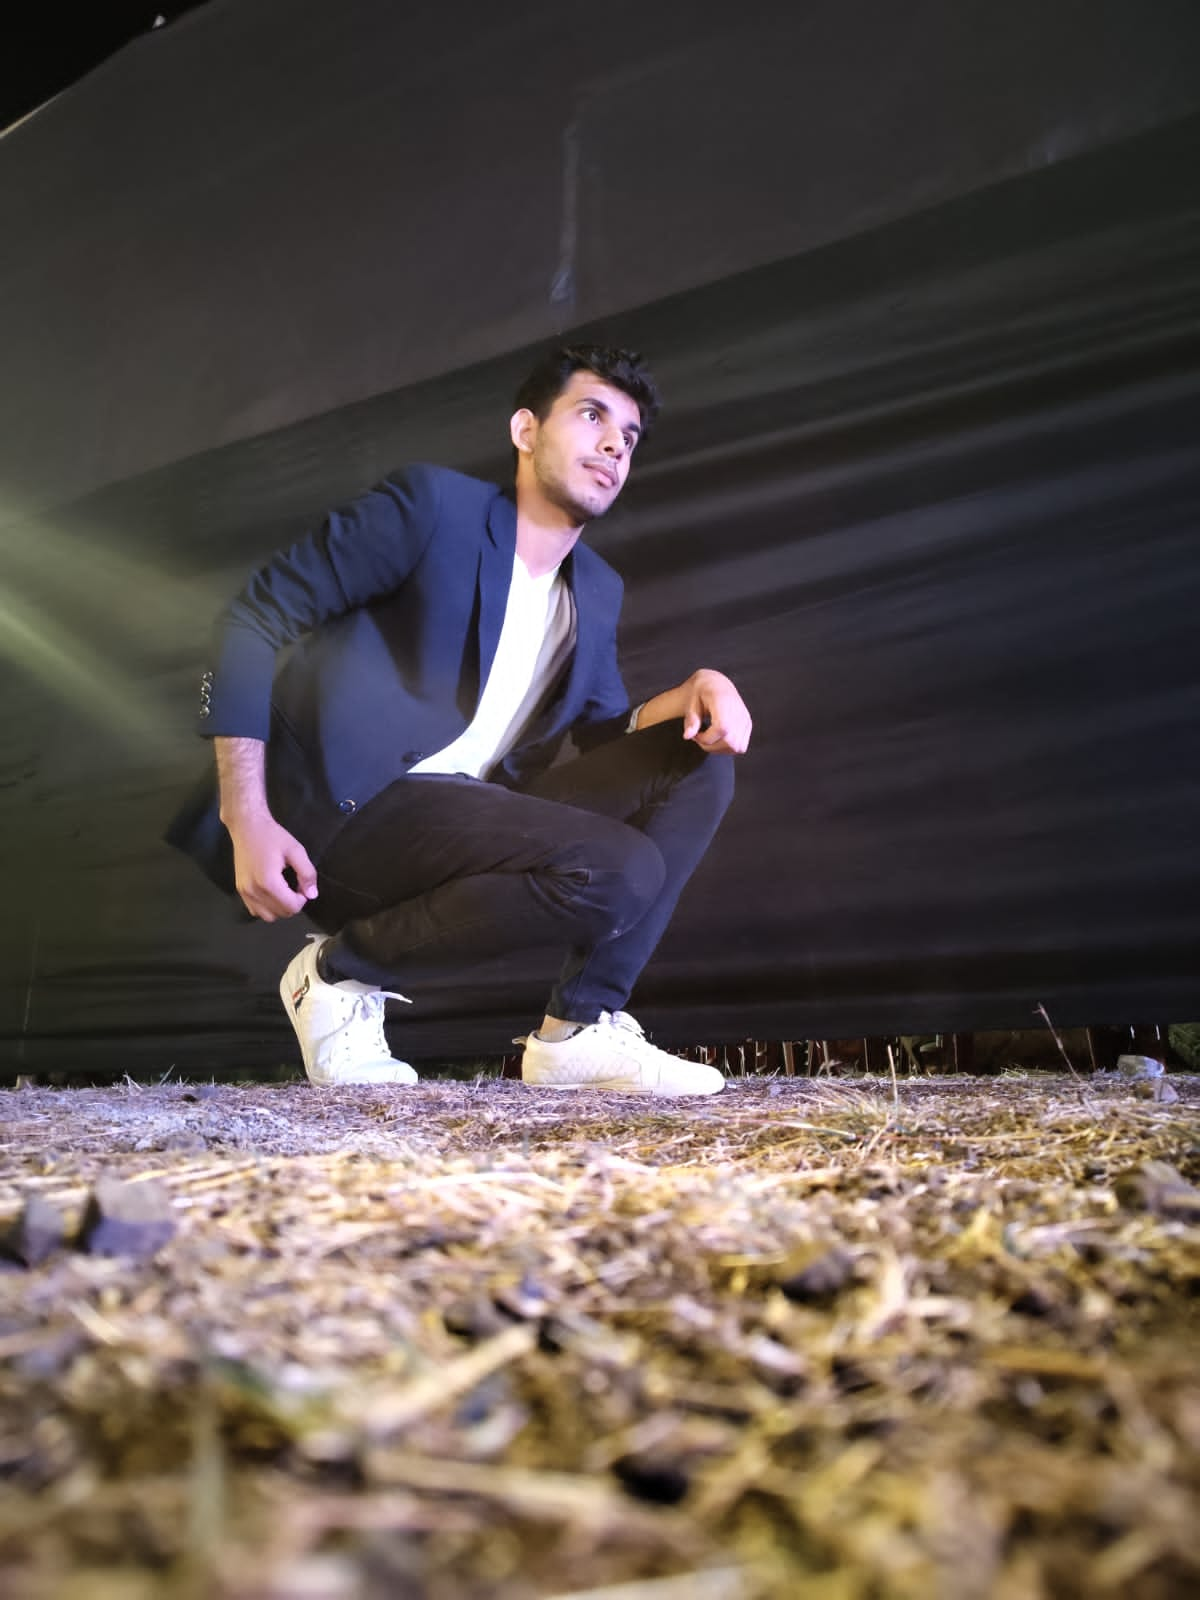

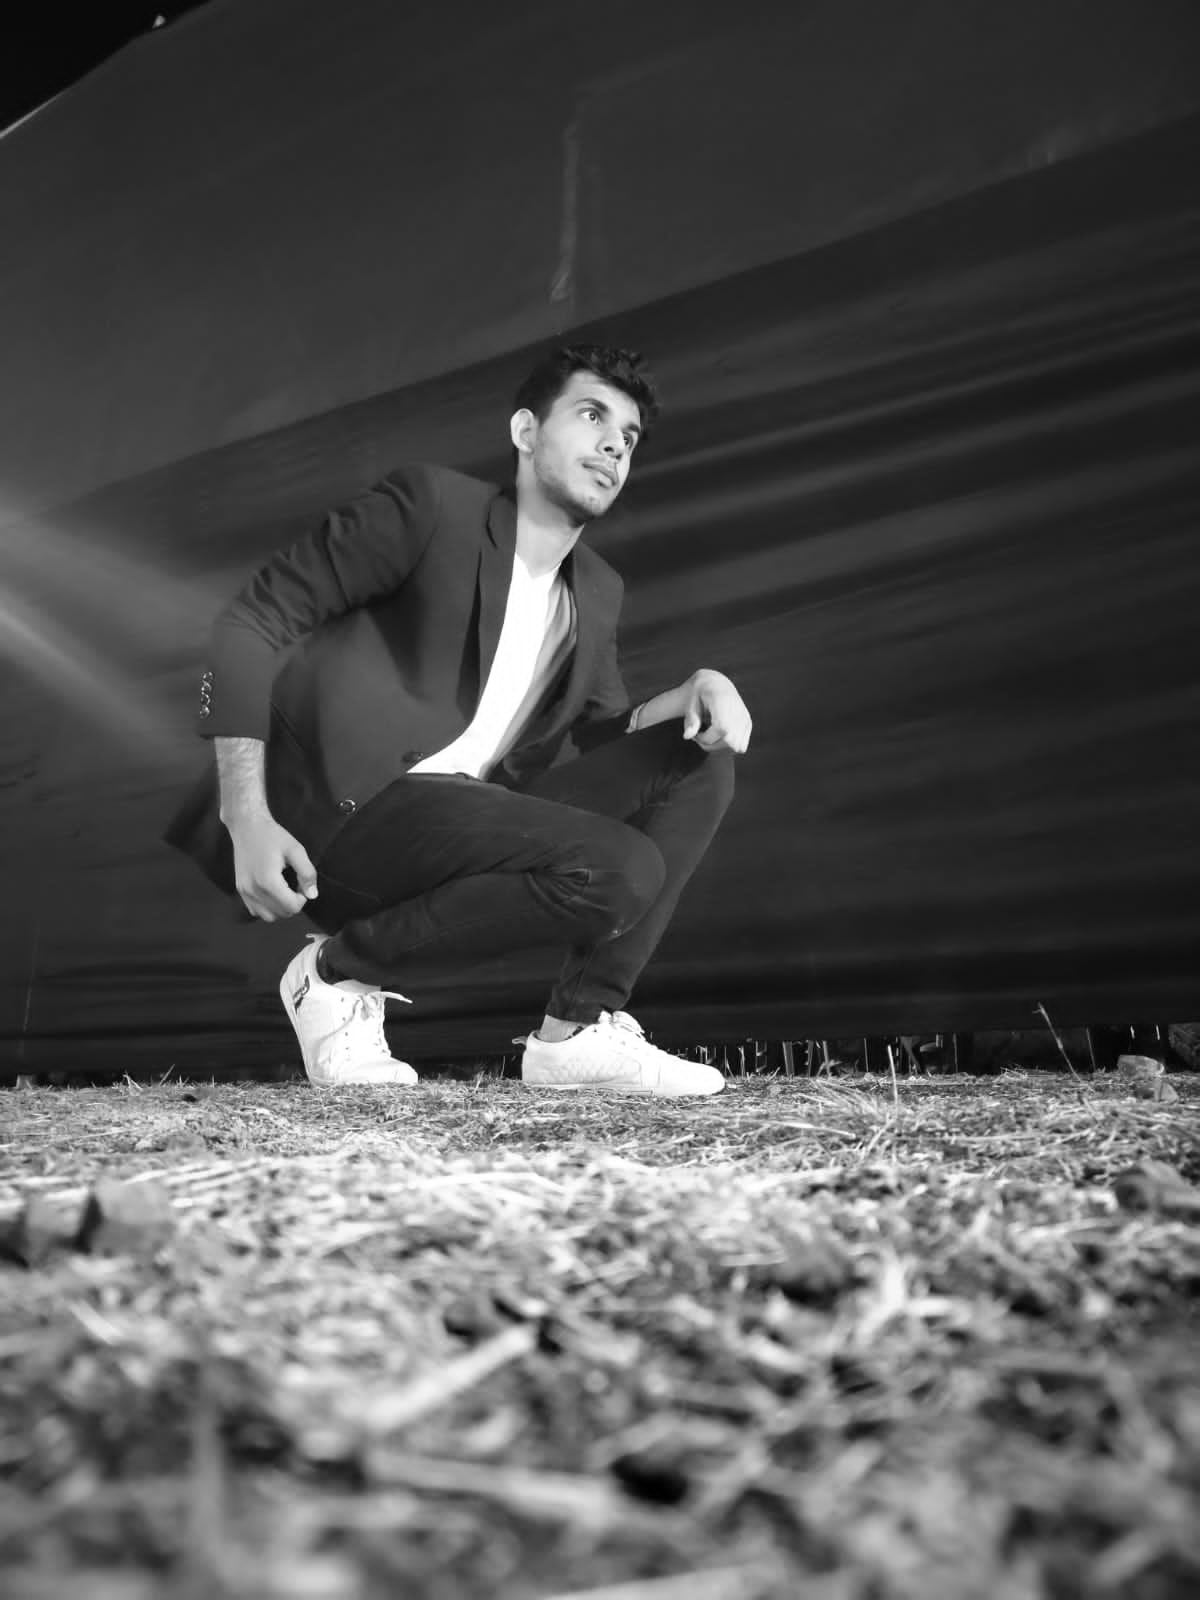

[[10 10 10 ... 31 31 31]
 [10 10 10 ... 31 31 31]
 [10 10 10 ... 31 31 31]
 ...
 [89 90 90 ... 33 33 33]
 [89 89 90 ... 34 34 34]
 [89 89 90 ... 34 34 34]]


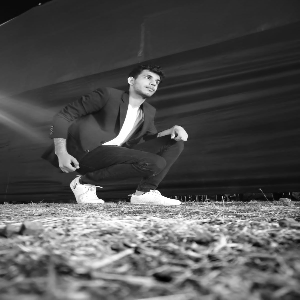

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

a=cv2.imread("/content/IMG-20230209-WA0010.jpg")
cv2_imshow(a)
# Gray
g=cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
cv2_imshow(g)
print(g)
# Resize
r=cv2.resize(g,(300,300))
cv2_imshow(r)

<ipython-input-62-5b30521c6134>:10: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
<ipython-input-62-5b30521c6134>:13: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


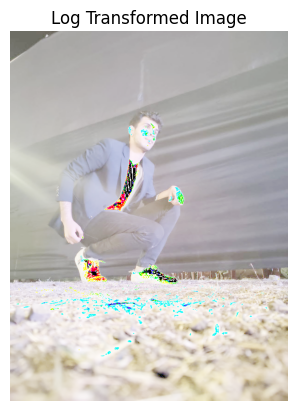

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image.
img = cv2.imread('/content/IMG-20230209-WA0010.jpg')

# Apply Log Transform.
c = 255 / (np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)

# Specify the data type and normalize it.
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Save the output.
cv2.imwrite('log_transformed.jpg', log_transformed)

# Display the output.
plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
plt.title('Log Transformed Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

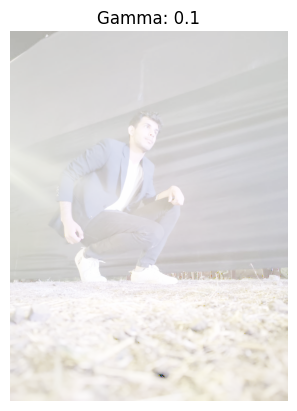

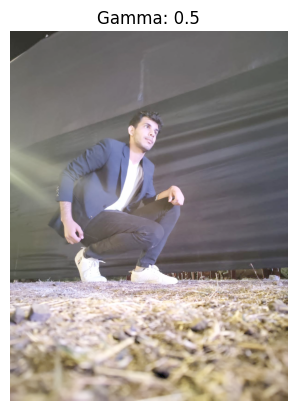

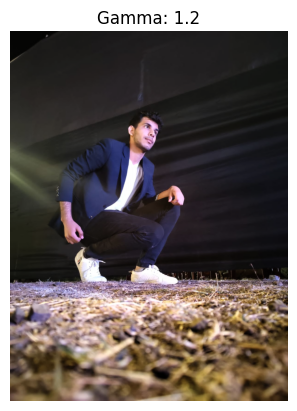

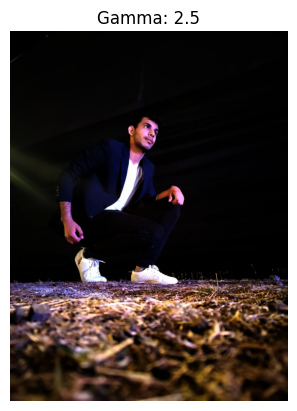

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image.
img = cv2.imread('/content/IMG-20230209-WA0010.jpg')

# Try 4 different Gamma values.
for gamma in [0.1, 0.5, 1.2, 2.5]:
    # Apply Gamma correction.
    gamma_corrected = np.array(255 * (img / 255) ** gamma, dtype='uint8')

    # Save edited images.
    cv2.imwrite(f'gamma_transformed_{gamma}.jpg', gamma_corrected)

    # Display the gamma-corrected image.
    plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma: {gamma}')
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

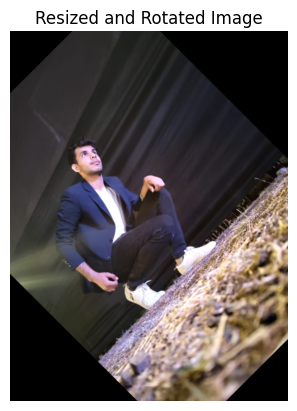

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('/content/IMG-20230209-WA0010.jpg')

# Resize the image (let's resize it to 50% of the original size)
scale_percent = 50  # percentage of the original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# Rotate the image by 45 degrees
# Get the dimensions of the image and the center of rotation
(h, w) = resized_img.shape[:2]
center = (w // 2, h // 2)

# Set rotation matrix (rotate around the center of the image)
angle = 45  # rotation angle
scale = 1.0  # scale factor
M = cv2.getRotationMatrix2D(center, angle, scale)

# Perform the rotation
rotated_img = cv2.warpAffine(resized_img, M, (w, h))

# Save and display the final result
cv2.imwrite('resized_rotated_image.jpg', rotated_img)

# Display the result using matplotlib
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Resized and Rotated Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

### __Step 1:	Importing necessary libraries & Loading the Original Image__ ###

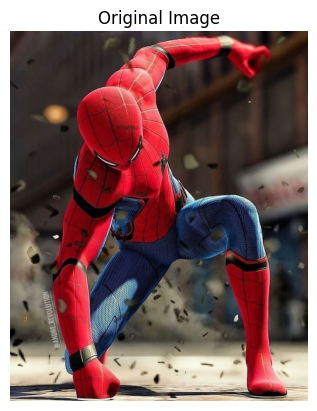

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('/content/[000096].png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

### __Step 2:	Gray-scaling the image__ ###

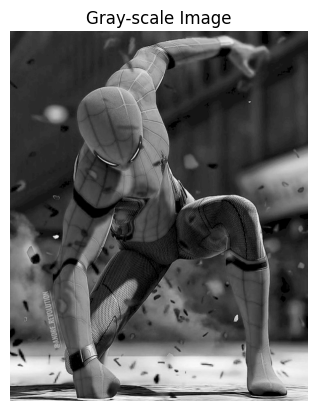

In [ ]:
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Gray-scale Image')
plt.axis('off')
plt.show()

### __Step 3:	Applying the Median filter__ ###

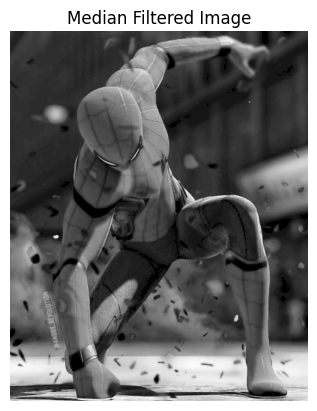

In [ ]:
median_filtered = cv2.medianBlur(image, 5)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

### __Step 4:	Defining the kernel for morphological operations & Applying erosion__ ###

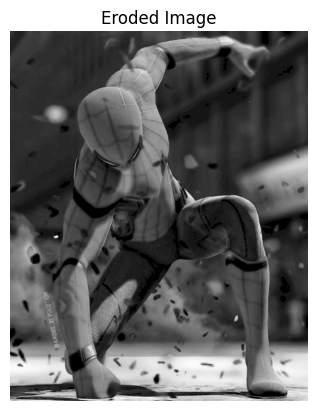

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_image = cv2.erode(median_filtered, kernel, iterations=1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


### __Step 5:	Applying dilation__ ###

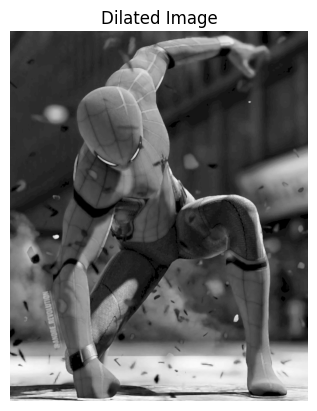

In [ ]:
dilated_image = cv2.dilate(median_filtered, kernel, iterations=1)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()

### __Step 6:	Applying histogram equalization__ ###

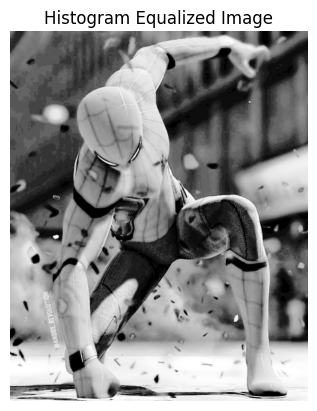

In [ ]:
equalized_image = cv2.equalizeHist(median_filtered)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

### __Step 7:	Applying log transformation__ ###

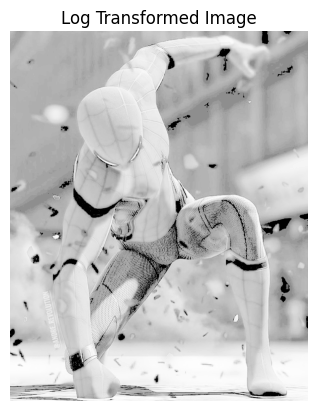

In [ ]:
c = 255 / np.log(1 + np.max(image))
log_transformed = c * np.log(1 + image.astype(np.float32))
log_transformed = np.array(log_transformed, dtype=np.uint8)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

### __Step 8:	Applying power log transformation__ ###

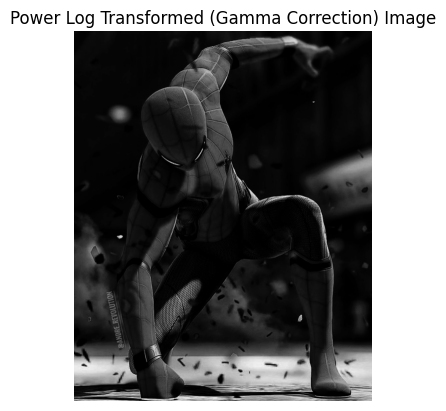

In [ ]:
gamma = 2.2
gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype='uint8')
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Power Log Transformed (Gamma Correction) Image')
plt.axis('off')
plt.show()

### __Hog Feature__ ###

(1200, 1600, 3)


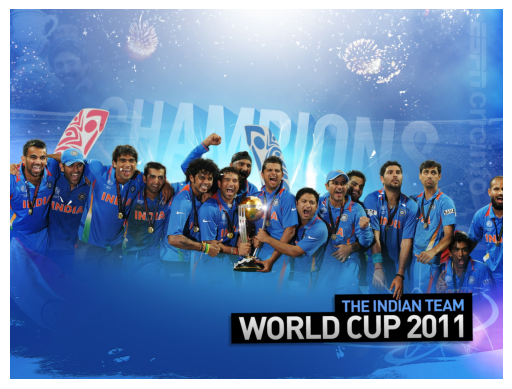

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

img = imread('/content/wallpaperflare.com_wallpaper_(14).jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256, 3)


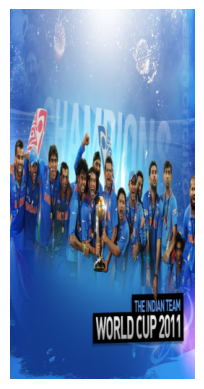

In [ ]:
resized_img = resize (img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

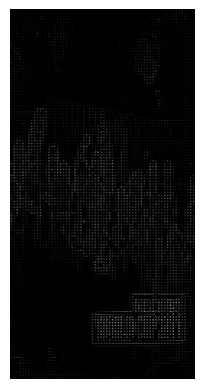

In [ ]:
fd, hog_image = hog(resized_img, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.axis("off")
plt.imshow(hog_image_rescaled, cmap="gray")
plt.show()

### __Canny Feature__ ###

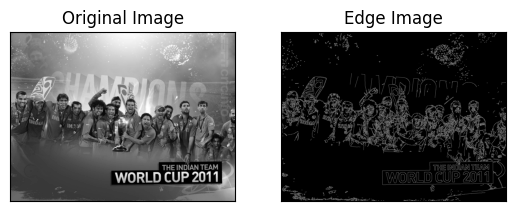

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/wallpaperflare.com_wallpaper_(14).jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges=cv.Canny(img, 100, 200)
plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks (()), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks ([]), plt.yticks([])
plt.show()

##**DV**##

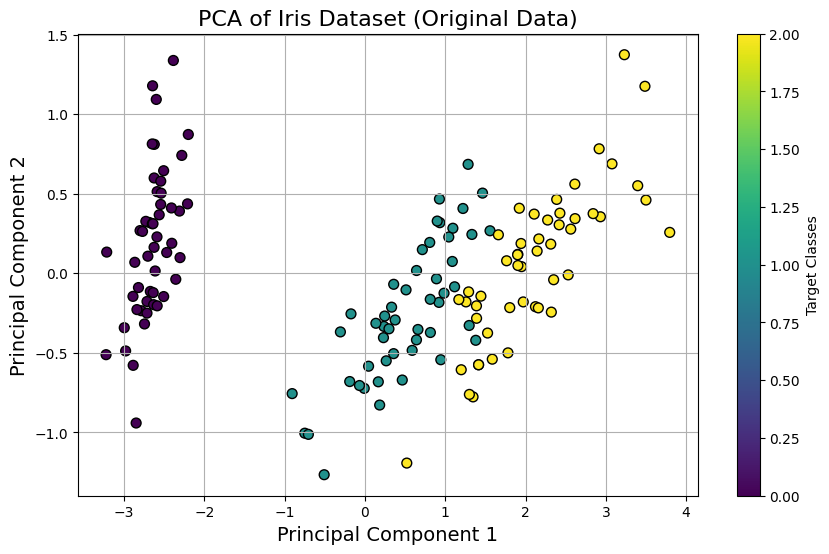

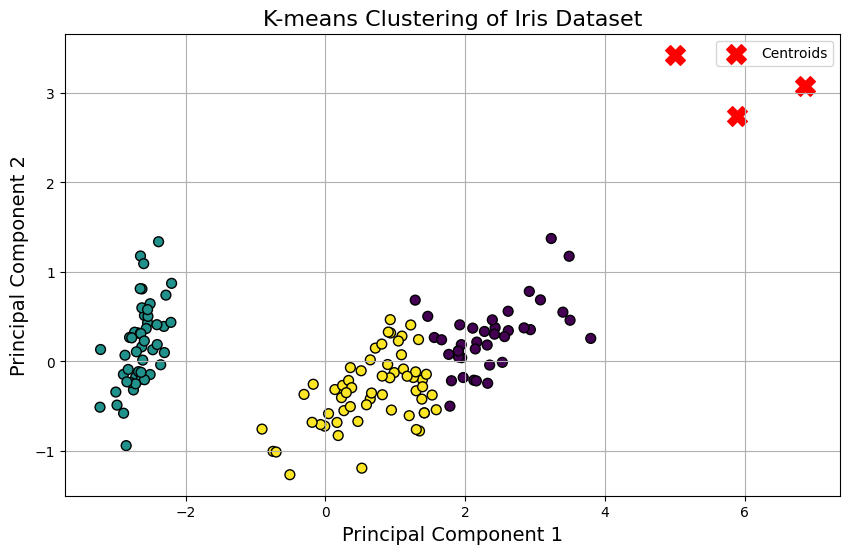

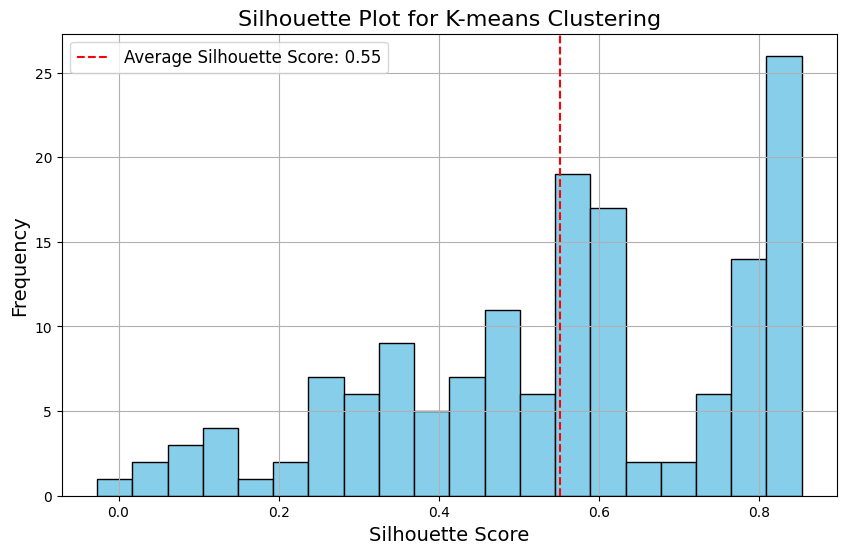

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Iris Dataset (Original Data)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.colorbar(label='Target Classes')
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-means Clustering of Iris Dataset", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Compute silhouette scores
silhouette_vals = silhouette_samples(X, y_kmeans)
avg_silhouette_score = silhouette_score(X, y_kmeans)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.hist(silhouette_vals, bins=20, edgecolor='black', color='skyblue')
plt.axvline(avg_silhouette_score, color='red', linestyle='--', label=f"Average Silhouette Score: {avg_silhouette_score:.2f}")
plt.title("Silhouette Plot for K-means Clustering", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

import plotly.express as px
import pandas as pd

# Prepare data for interactive plot
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans

# 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='PC1', y='PC2', z=y_kmeans, color='Cluster', title="Interactive 3D Scatter Plot of K-means Clustering", labels={'Cluster': 'Cluster Label'})
fig.show()

In [ ]:
# Define the 3x3 LED matrix for each digit (0 to 9)
led_matrices = {
    0: [1, 1, 1, 1, 0, 1, 1, 1, 1],  # Example for 0
    1: [0, 1, 1, 0, 0, 1, 0, 0, 1],  # Example for 1
    2: [1, 1, 0, 1, 1, 1, 1, 0, 1],  # Example for 2
    3: [1, 1, 0, 1, 1, 1, 0, 1, 1],  # Example for 3
    4: [0, 1, 1, 1, 1, 1, 0, 1, 0],  # Example for 4
    5: [1, 0, 1, 1, 1, 1, 0, 1, 1],  # Example for 5
    6: [1, 0, 1, 1, 1, 1, 1, 1, 1],  # Example for 6
    7: [1, 1, 1, 0, 0, 1, 0, 0, 1],  # Example for 7
    8: [1, 1, 1, 1, 1, 1, 1, 1, 1],  # Example for 8
    9: [1, 1, 1, 1, 1, 1, 0, 1, 1],  # Example for 9
}

# Define the positions of toggling: Each entry here represents the lights to toggle
toggle_combinations = [
    [6],           # Toggle 6th light in first matrix
    [6, 7],        # Toggle 6th in first and 7th in second
    [6, 7, 5],     # Toggle 6th, 7th in first and 5th in third
    [6, 7, 4],     # Toggle 6th, 7th in first and 4th in third
    [6, 7, 4, 6],  # Toggle 6th, 7th in first, 4th in third, 6th in fourth
]

# Function to toggle the LEDs in the given matrix
def toggle_leds(matrix, toggles):
    matrix_copy = matrix[:]
    for toggle in toggles:
        matrix_copy[toggle - 1] = 1 - matrix_copy[toggle - 1]  # Toggle the LED
    return matrix_copy

# Function to convert the LED matrix to a digit
def matrix_to_number(matrix):
    return int("".join(str(x) for x in matrix))

# List to hold all the unique numbers formed
unique_numbers = set()

# Try all toggle combinations
for toggles in toggle_combinations:
    formed_number = []
    # For each matrix, apply the toggles and extract the number
    for digit in range(10):
        toggled_matrix = toggle_leds(led_matrices[digit], toggles)
        formed_number.append(matrix_to_number(toggled_matrix))

    # Convert the formed digits into a single number
    unique_numbers.add(int("".join(str(num) for num in formed_number)))

# Sum of all unique numbers formed
result_sum = sum(unique_numbers)

# Output the result
print("The sum of all formed numbers is:", result_sum)


The sum of all formed numbers is: 5553111555521140555034110555034145555341450505341455505341155555211405555341155555341455
